# Finetune semantic segmentors on a customized dataset 


1. Select a semantic segmentation model: SEgmentation TRansformer (SETR).
2. Add a new dataset class.
3. Create a config file.
4. Conduct training and evaluation.

<a href="https://colab.research.google.com/drive/1e6QgCHvfcm54pSSv0Cf4GiUlpNPXoMxv?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By [Ibrahim Sobh](https://www.linkedin.com/in/ibrahim-sobh-phd-8681757/)  



SEgmentation TRansformer (SETR): [Rethinking Semantic Segmentation from a Sequence-to-Sequence Perspective with Transformers](https://arxiv.org/abs/2012.15840)


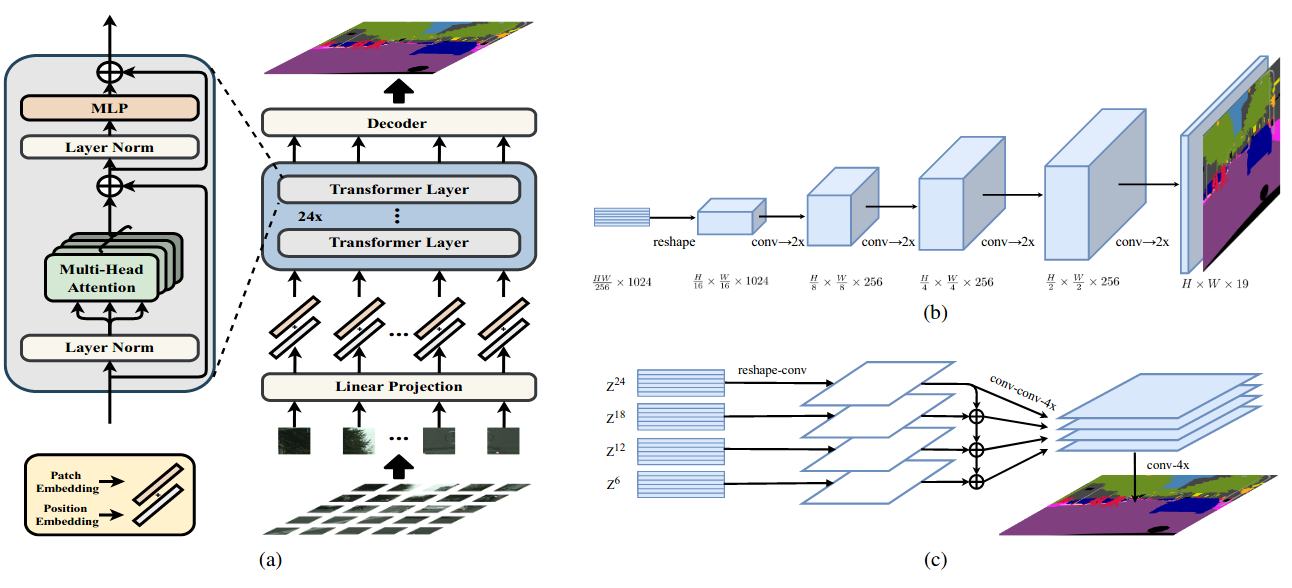

[Scene Understanding Datasets](http://dags.stanford.edu/projects/scenedataset.html)

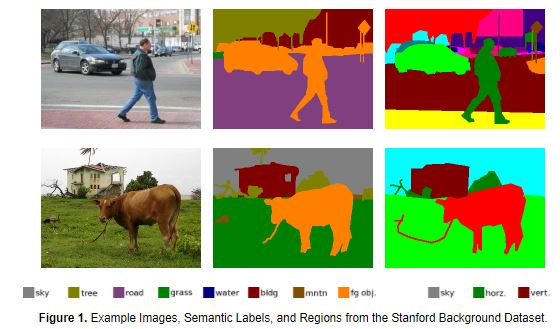

## Setup

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
import torch 
torch.__version__

'1.10.0+cu111'

In [ ]:
!pip install openmim
!mim install mmsegmentation

  Created wheel for openmim: filename=openmim-0.1.5-py2.py3-none-any.whl size=42503 sha256=b34843074a51d2e4502b42c86973cfd6350c4926d9d28f0a68da62019cecb1b8
  Stored in directory: /root/.cache/pip/wheels/16/8b/e1/bdebbbc687aa50224a5ce46fe97a040a0c59f92b34bfc750b6
Successfully built openmim
installing mmsegmentation from https://github.com/open-mmlab/mmsegmentation.git.
Cloning into '/tmp/tmp3pebl_r0/mmsegmentation'...
remote: Enumerating objects: 6816, done.
remote: Total 6816 (delta 0), reused 0 (delta 0), pack-reused 6816
Receiving objects: 100% (6816/6816), 12.74 MiB | 28.11 MiB/s, done.
Resolving deltas: 100% (5062/5062), done.
Note: checking out '6670672345200cd6e855a2848d38cb56c9a15e82'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (

In [ ]:
!rm -rf mmsegmentation
!git clone https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 6816, done.
remote: Total 6816 (delta 0), reused 0 (delta 0), pack-reused 6816
Receiving objects: 100% (6816/6816), 12.74 MiB | 23.04 MiB/s, done.
Resolving deltas: 100% (5062/5062), done.
/content/mmsegmentation


## Download checkpoints

In [ ]:
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmsegmentation/v0.5/setr/setr_naive_512x512_160k_b16_ade20k/setr_naive_512x512_160k_b16_ade20k_20210619_191258-061f24f5.pth \
      -O checkpoints/setr_naive_512x512_160k_b16_ade20k_20210619_191258-061f24f5.pth

--2022-04-22 12:51:24--  https://download.openmmlab.com/mmsegmentation/v0.5/setr/setr_naive_512x512_160k_b16_ade20k/setr_naive_512x512_160k_b16_ade20k_20210619_191258-061f24f5.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1222385981 (1.1G) [application/octet-stream]
Saving to: ‘checkpoints/setr_naive_512x512_160k_b16_ade20k_20210619_191258-061f24f5.pth’

checkpoints/setr_na 100%[===================>]   1.14G  7.87MB/s    in 2m 35s  

2022-04-22 12:53:59 (7.54 MB/s) - ‘checkpoints/setr_naive_512x512_160k_b16_ade20k_20210619_191258-061f24f5.pth’ saved [1222385981/1222385981]



## Inference

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset
import mmcv
from google.colab.patches import cv2_imshow
import numpy as np 
import os.path as osp
from PIL import Image
import matplotlib.patches as mpatches

In [ ]:
!pwd

/content/mmsegmentation


/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:233: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


load checkpoint from local path: ./checkpoints/setr_naive_512x512_160k_b16_ade20k_20210619_191258-061f24f5.pth


/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


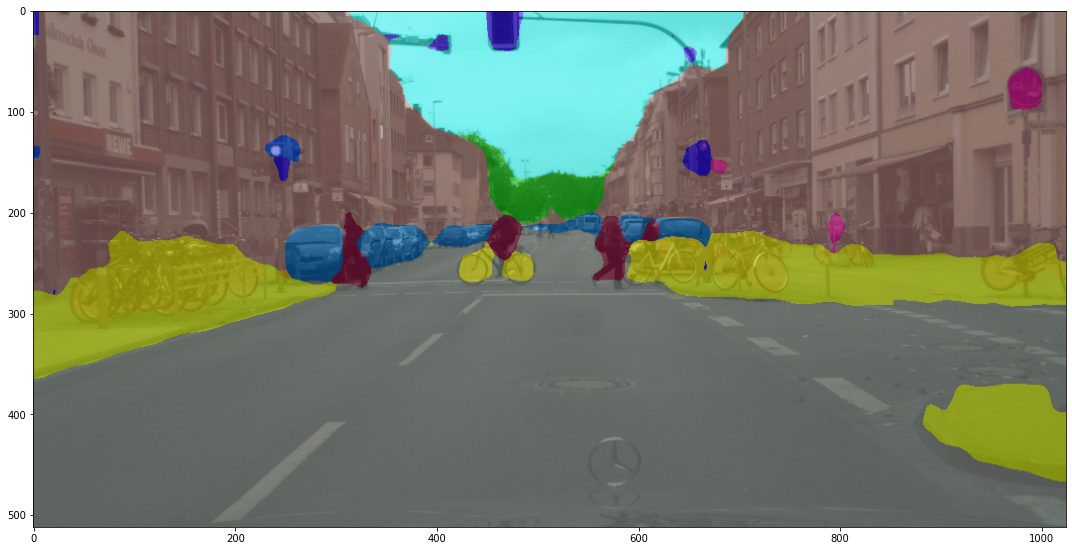

In [ ]:
# Select a test image
img = 'demo/demo.png'

checkpoint_file = './checkpoints/setr_naive_512x512_160k_b16_ade20k_20210619_191258-061f24f5.pth'
config_file = './configs/setr/setr_naive_512x512_160k_b16_ade20k.py' 

model = init_segmentor(config_file, checkpoint_file, device='cuda:0')
result = inference_segmentor(model, img)
show_result_pyplot(model, img, result)

## Finetune the semantic segmentation model on a custom dataset

### Download the custom dataset

Based on [article](https://mducducd33.medium.com/sematic-segmentation-using-mmsegmentation-bcf58fb22e42)


In [ ]:
# download and unzip
!wget http://dags.stanford.edu/data/iccv09Data.tar.gz -O stanford_background.tar.gz
!tar xf stanford_background.tar.gz

--2022-04-22 12:54:21--  http://dags.stanford.edu/data/iccv09Data.tar.gz
Resolving dags.stanford.edu (dags.stanford.edu)... 171.64.68.10
Connecting to dags.stanford.edu (dags.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14727974 (14M) [application/x-gzip]
Saving to: ‘stanford_background.tar.gz’

stanford_background 100%[===================>]  14.04M  7.83MB/s    in 1.8s    

2022-04-22 12:54:22 (7.83 MB/s) - ‘stanford_background.tar.gz’ saved [14727974/14727974]



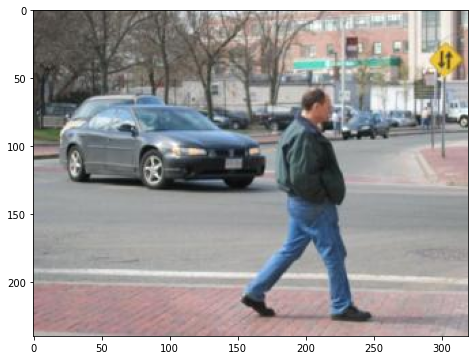

In [ ]:
img = mmcv.imread('iccv09Data/images/6000124.jpg')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:
# convert annotation (text labels) to semantic map (image)
data_root = 'iccv09Data'
img_dir = 'images'
ann_dir = 'labels'
classes = ('sky', 'tree', 'road', 'grass', 'water', 'bldg', 'mntn', 'fg obj')
palette = [[128, 128, 128], [129, 127, 38], [120, 69, 125], [53, 125, 34], 
           [0, 11, 123], [118, 20, 12], [122, 81, 25], [241, 134, 51]]
for file in mmcv.scandir(osp.join(data_root, ann_dir), suffix='.regions.txt'):
  seg_map = np.loadtxt(osp.join(data_root, ann_dir, file)).astype(np.uint8)
  seg_img = Image.fromarray(seg_map).convert('P')
  seg_img.putpalette(np.array(palette, dtype=np.uint8))
  seg_img.save(osp.join(data_root, ann_dir, file.replace('.regions.txt', '.png')))

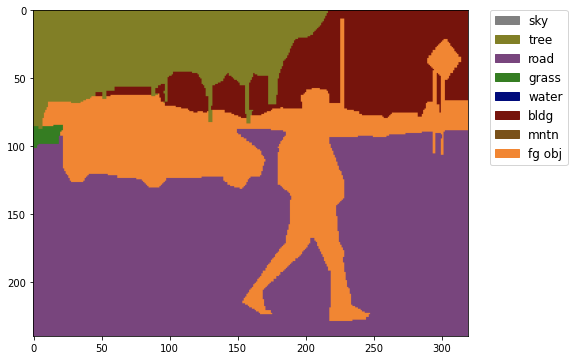

In [ ]:
img = Image.open('iccv09Data/labels/6000124.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(8)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large')
plt.show()

In [ ]:
# split train/val set 
split_dir = 'splits'
mmcv.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmcv.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 80% as train set
  train_length = int(len(filename_list)*4/5)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 20% as val set
  f.writelines(line + '\n' for line in filename_list[train_length:])

In [ ]:
@DATASETS.register_module()
class StanfordBackgroundDataset(CustomDataset):
  CLASSES = classes
  PALETTE = palette
  def __init__(self, split, **kwargs):
    super().__init__(img_suffix='.jpg', seg_map_suffix='.png', 
                     split=split, **kwargs)
    assert osp.exists(self.img_dir) and self.split is not None

### Create the config file

In [ ]:
from mmcv import Config
cfg = Config.fromfile(config_file)

In [ ]:
# modify the file from the cityscapes dataset to the new dataset

from mmseg.apis import set_random_seed

# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head[0].norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head[1].norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head[2].norm_cfg = cfg.norm_cfg


# modify num classes of the model in decode/auxiliary head

cfg.model.decode_head.num_classes=8
cfg.model.auxiliary_head[0].num_classes=8
cfg.model.auxiliary_head[1].num_classes=8
cfg.model.auxiliary_head[2].num_classes=8

# Modify dataset type and path
cfg.dataset_type = 'StanfordBackgroundDataset'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 4
cfg.data.workers_per_gpu= 4

cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (256, 256)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(320, 240), ratio_range=(0.5, 2.0)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(320, 240),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]


cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = img_dir
cfg.data.train.ann_dir = ann_dir
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'splits/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = img_dir
cfg.data.val.ann_dir = ann_dir
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'splits/val.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = img_dir
cfg.data.test.ann_dir = ann_dir
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'splits/val.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = 'checkpoints/setr_naive_512x512_160k_b16_ade20k_20210619_191258-061f24f5.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

cfg.runner.max_iters = 250
cfg.log_config.interval = 10
cfg.evaluation.interval = 250
cfg.checkpoint_config.interval = 250

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# Let's have a look at the final config used for training
# print(f'Config:\n{cfg.pretty_text}')

### Finetune the model 

In [ ]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor

datasets = [build_dataset(cfg.data.train)]
model = build_segmentor(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

model.CLASSES = datasets[0].CLASSES

mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))

2022-04-22 12:54:53,364 - mmseg - INFO - Loaded 572 images
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:233: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


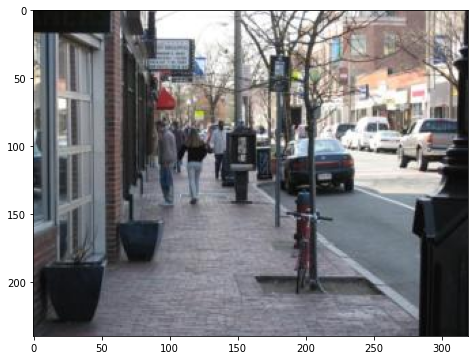

In [ ]:
# sample test
img = mmcv.imread('iccv09Data/images/6000128.jpg')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

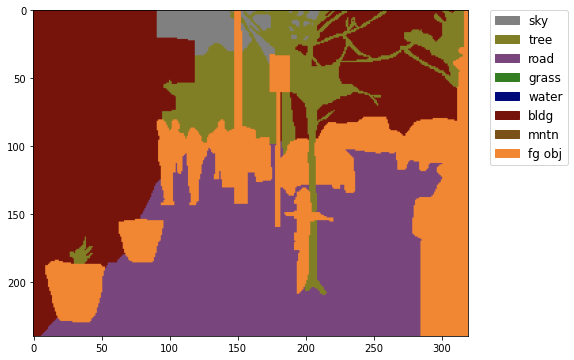

In [ ]:
img = Image.open('iccv09Data/labels/6000128.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))
patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(8)]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large')
plt.show()

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


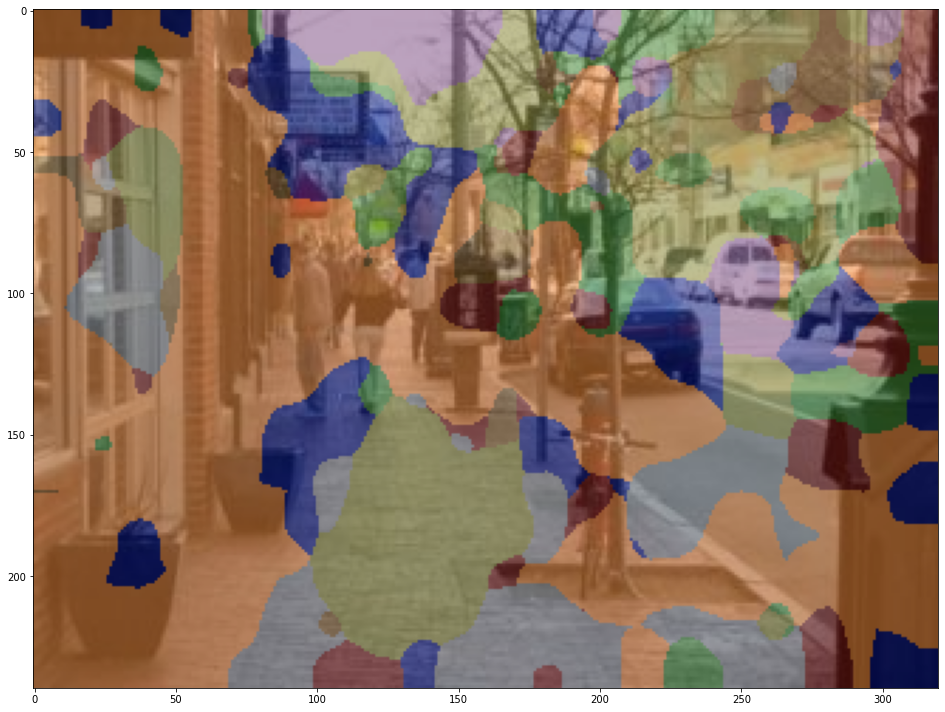

In [ ]:
# result of test sample before fine tuning 
img = mmcv.imread('iccv09Data/images/6000128.jpg')
model.cfg = cfg
result = inference_segmentor(model, img)
show_result_pyplot(model, img, result, palette)

In [ ]:
# Fine tune the model  
train_segmentor(model, datasets, cfg, distributed=False, validate=True, meta=dict())

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2022-04-22 12:55:01,776 - mmseg - INFO - Loaded 143 images
2022-04-22 12:55:01,777 - mmseg - INFO - load checkpoint from local path: checkpoints/setr_naive_512x512_160k_b16_ade20k_20210619_191258-061f24f5.pth
2022-04-22 12:55:02,508 - mmseg - WARNING - The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([150, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([8, 256, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a para

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 143/143, 5.4 task/s, elapsed: 27s, ETA:     0s

2022-04-22 13:02:11,908 - mmseg - INFO - per class results:
2022-04-22 13:02:11,912 - mmseg - INFO - 
+--------+-------+-------+
| Class  |  IoU  |  Acc  |
+--------+-------+-------+
|  sky   | 87.76 | 92.51 |
|  tree  | 69.29 | 83.52 |
|  road  | 83.09 | 92.03 |
| grass  | 75.73 | 88.17 |
| water  | 77.49 | 92.18 |
|  bldg  | 74.03 | 83.72 |
|  mntn  | 37.44 | 45.32 |
| fg obj | 59.05 | 74.96 |
+--------+-------+-------+
2022-04-22 13:02:11,913 - mmseg - INFO - Summary:
2022-04-22 13:02:11,918 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 85.46 | 70.48 | 81.55 |
+-------+-------+-------+
2022-04-22 13:02:11,922 - mmseg - INFO - Iter(val) [143]	aAcc: 0.8546, mIoU: 0.7048, mAcc: 0.8155, IoU.sky: 0.8776, IoU.tree: 0.6929, IoU.road: 0.8309, IoU.grass: 0.7573, IoU.water: 0.7749, IoU.bldg: 0.7403, IoU.mntn: 0.3744, IoU.fg obj: 0.5905, Acc.sky: 0.9251, Acc.tree: 0.8352, Acc.road: 0.9203, Acc.grass: 0.8817, Acc.water: 0.9218, Acc.bldg: 0.837

### Inference

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


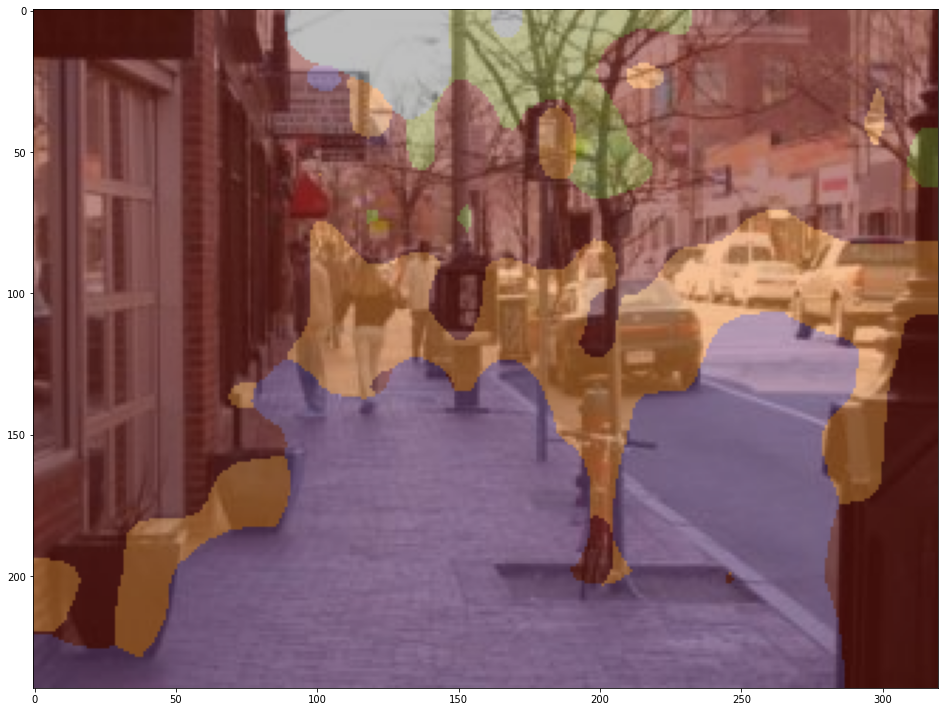

In [ ]:
# Result of test sample after fine tuning 
img = mmcv.imread('iccv09Data/images/6000128.jpg')
model.cfg = cfg
result = inference_segmentor(model, img)
show_result_pyplot(model, img, result, palette)